In [20]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

In [ ]:
rawData = pd.read_csv('/content/ICR.csv')
format(rawData.shape)

'(617, 58)'

In [ ]:
rawData.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [ ]:
rawData.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


<Axes: ylabel='Class'>

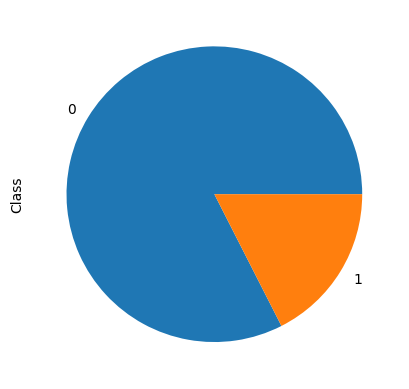

In [ ]:
plot_df = rawData.Class.value_counts()
plot_df.plot(kind="pie")

so we detected its unbalance dataset

In [ ]:
# throw ID column
FEATURE_COLUMNS = [i for i in rawData.columns if i not in ['Id']]

In [ ]:
# split our small dataset to 5 fold
kf = KFold(n_splits=5)

In [ ]:
# create df for oop(out of fold)
oof = pd.DataFrame( data=np.zeros( (len(rawData), 1) ) , index=rawData.index )

models = {}
accuracy = {}
cross_entropy = {}

In [ ]:
all_models = tfdf.keras.get_all_models()
all_models

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
# understanding unbalance datas
neg , pos = np.bincount( rawData['Class'] )
total = neg+pos

print( 'percentage of posetive classes is {:.2f}%'.format( 100 * pos / total ))

percentage of posetive classes is 17.50%


In [ ]:
# i choose class weight strategy for dealing this unbalance
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.61
Weight for class 1: 2.86


In [ ]:
# set model and  Loop through each fold
for i, (train_index, valid_index) in enumerate(kf.split(X=rawData)):
        print('##### Fold',i+1)

        train_df = rawData.iloc[train_index]
        valid_df = rawData.iloc[valid_index]
        valid_ids = valid_df.index.values

        # Select only feature columns for training.
        train_df = train_df[FEATURE_COLUMNS]
        valid_df = valid_df[FEATURE_COLUMNS]


        train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label='Class')
        valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_df, label='Class')


        rf = tfdf.keras.RandomForestModel(num_trees=50)
        rf.compile( metrics=["accuracy", "binary_crossentropy"] )
        rf.fit(x=train_ds, class_weight=class_weight)

        # Store the model
        models[f"fold_{i+1}"] = rf


        # Predict OOF value for validation data
        predict = rf.predict(x=valid_ds)

        # Store the predictions in oof dataframe
        oof.loc[valid_ids, 0] = predict.flatten()

        # Evaluate and store the metrics in respective dicts
        evaluation = rf.evaluate(x=valid_ds,return_dict=True)
        accuracy[f"fold_{i+1}"] = evaluation["accuracy"]
        cross_entropy[f"fold_{i+1}"]= evaluation["binary_crossentropy"]

##### Fold 1


Use /tmp/tmpewmppnvn as temporary training directory
Reading training dataset...
Training dataset read in 0:00:09.067552. Found 493 examples.
Training model...
Model trained in 0:00:00.158352
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.
1/1 [==============================] - 1s 822ms/step - loss: 0.0000e+00 - accuracy: 0.9355 - binary_crossentropy: 0.2311
##### Fold 2


Use /tmp/tmpe3cv6dpr as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.986752. Found 493 examples.
Training model...
Model trained in 0:00:00.099627
Compiling model...
Model compiled.
1/1 [==============================] - 0s 337ms/step - loss: 0.0000e+00 - accuracy: 0.9113 - binary_crossentropy: 0.2586
##### Fold 3


Use /tmp/tmpecusr5eu as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.973551. Found 494 examples.
Training model...
Model trained in 0:00:00.094800
Compiling model...


Model compiled.


1/1 [==============================] - 0s 348ms/step - loss: 0.0000e+00 - accuracy: 0.9106 - binary_crossentropy: 0.2822
##### Fold 4


Use /tmp/tmpby9f429h as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.959293. Found 494 examples.
Training model...
Model trained in 0:00:00.085943
Compiling model...
Model compiled.
1/1 [==============================] - 0s 380ms/step - loss: 0.0000e+00 - accuracy: 0.8862 - binary_crossentropy: 0.2695
##### Fold 5


Use /tmp/tmpm5myr3ml as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.967452. Found 494 examples.
Training model...
Model trained in 0:00:00.084599
Compiling model...
Model compiled.


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 366ms/step - loss: 0.0000e+00 - accuracy: 0.9593 - binary_crossentropy: 0.2176


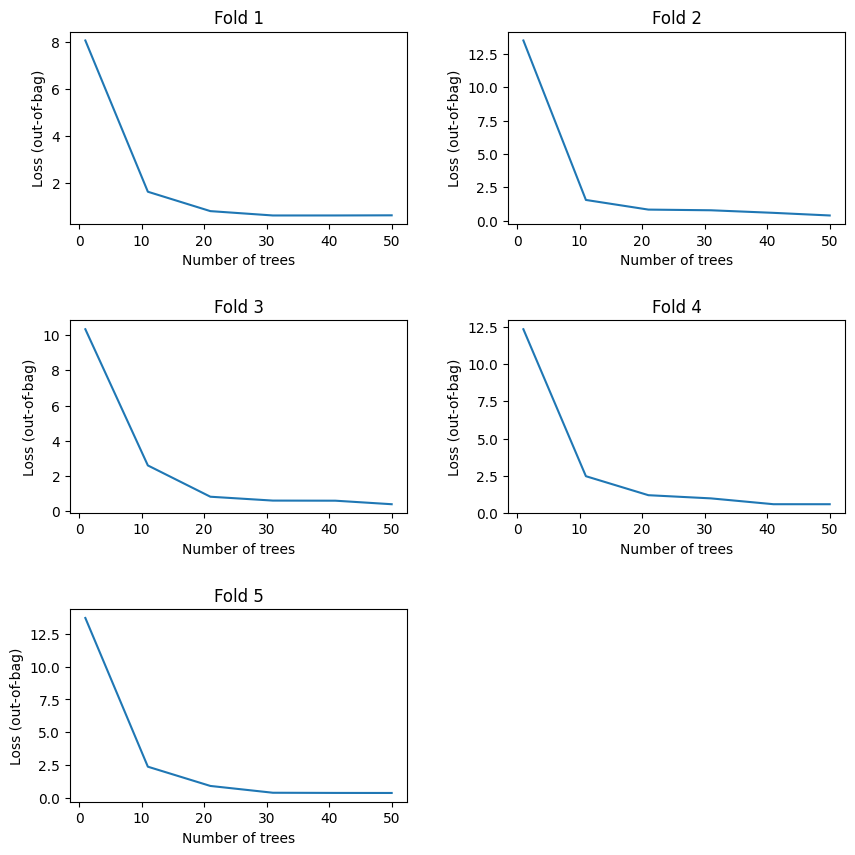

In [ ]:
# visualization models

figure, axis = plt.subplots(3, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, fold_no in enumerate(models.keys()):
    row = i//2
    col = i % 2
    logs = models[fold_no].make_inspector().training_logs()
    axis[row, col].plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
    axis[row, col].set_title(f"Fold {i+1}")
    axis[row, col].set_xlabel('Number of trees')
    axis[row, col].set_ylabel('Loss (out-of-bag)')

axis[2][1].set_visible(False)
plt.show()

In [ ]:
for _model in  models:
    average_loss = cross_entropy[_model]
    average_acc = accuracy[_model]
    print(f"{_model}: accuracy: {accuracy[_model]:.4f} loss: {cross_entropy[_model]:.4f}")


fold_1: accuracy: 0.9355 loss: 0.2311
fold_2: accuracy: 0.9113 loss: 0.2586
fold_3: accuracy: 0.9106 loss: 0.2822
fold_4: accuracy: 0.8862 loss: 0.2695
fold_5: accuracy: 0.9593 loss: 0.2176


In [ ]:
# show some important variables

inspector = models['fold_1'].make_inspector()

print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_NODES
	 NUM_AS_ROOT
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH


In [ ]:
# Each line is: (feature name, (index of the feature), importance score)
inspector.variable_importances()["NUM_AS_ROOT"]

[("DU" (1; #32), 6.0),
 ("BQ" (1; #12), 4.0),
 ("DA" (1; #25), 4.0),
 ("DI" (1; #29), 4.0),
 ("EB" (1; #35), 4.0),
 ("AB" (1; #0), 3.0),
 ("CC" (1; #16), 3.0),
 ("FL" (1; #47), 3.0),
 ("GL" (1; #55), 3.0),
 ("AF" (1; #1), 2.0),
 ("AR" (1; #4), 2.0),
 ("CD_" (1; #17), 2.0),
 ("FD_" (1; #44), 2.0),
 ("FR" (1; #48), 2.0),
 ("BN" (1; #10), 1.0),
 ("CR" (1; #21), 1.0),
 ("DH" (1; #28), 1.0),
 ("EE" (1; #36), 1.0),
 ("EH" (1; #38), 1.0),
 ("FI" (1; #46), 1.0)]

In [ ]:
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create a folder in the root directory
!mkdir -p "/content/drive/My Drive/My Folder"

# Write a sample file to Google Drive
with open('/content/drive/My Drive/My Folder/sample.txt', 'w') as f:
  f.write('Hello, World!')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
